# **Energy Consumption Prediction Model using Linear Regression**
The **Energy Consumption Prediction Model using Linear Regression** project aims to analyze historical energy usage data and develop a predictive model to estimate future consumption. By identifying key factors such as temperature, time of day, and appliance usage, the project leverages linear regression to establish relationships and forecast energy demand. The model helps optimize energy efficiency, reduce costs, and support sustainable energy management. The project involves data collection, preprocessing, model training, evaluation, and deployment for real-world applications..

## **Step 1 : Import Libraries and Load Data**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for creating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
    * **GridSearchCV**: Performs an exhaustive search over specified hyperparameter values, identifying the best-performing model.
    * **cross_val_score**: Evaluates model performance through cross-validation by splitting the data into multiple folds and computing average accuracy.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.compose**:
  * **ColumnTransformer**: Applies different transformations to specific columns in the dataset, allowing a combination of encoding and scaling steps in a single pipeline.
* **sklearn.linear_model**:
  * **LinearRegression**: Builds a linear model by fitting a straight line to the data, predicting the target variable based on input features.
  * **Ridge**: A variation of linear regression that introduces L2 regularization, which reduces model complexity by penalizing large coefficients.
  * **Lasso**: Applies L1 regularization to linear regression, effectively performing feature selection by shrinking less important feature coefficients to zero.
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score **: Indicates how well the model fits the data, representing the proportion of variance explained by the model.
* **sklearn.pipeline**:
  * **Pipeline**: Automates a sequence of data processing and model training steps, ensuring a streamlined workflow without repeated manual operations.



In [153]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [155]:
df = pd.read_csv(r"C:\Users\91932\Downloads\Energy_Consumption.csv")

In [157]:
df

,Temperature (°C),Humidity (%),Occupants,Appliance Usage (kWh),Time of Day (hours),Energy Consumption (kWh)
0,21,64,2,2.99,15,8.59
1,34,73,4,1.67,20,9.52
2,29,69,3,1.20,6,7.93
3,25,51,3,2.71,3,8.89
4,22,56,1,2.37,0,6.67
...,...,...,...,...,...,...
95,26,62,3,0.74,12,7.23
96,16,30,4,1.28,18,6.08
97,15,48,3,2.95,16,7.48
98,30,31,1,0.94,3,5.24


In [159]:
print("Dataset Shape:\n", df.shape)
print("\nSample Data:\n", df.head())

Dataset Shape:
 (100, 6)

Sample Data:
    Temperature (°C)  Humidity (%)  Occupants  Appliance Usage (kWh)  \
0                21            64          2                   2.99   
1                34            73          4                   1.67   
2                29            69          3                   1.20   
3                25            51          3                   2.71   
4                22            56          1                   2.37   

   Time of Day (hours)  Energy Consumption (kWh)  
0                   15                      8.59  
1                   20                      9.52  
2                    6                      7.93  
3                    3                      8.89  
4                    0                      6.67  


## **Step 2 : Exploratory Data Analysis**


In [162]:
df.describe()

,Temperature (°C),Humidity (%),Occupants,Appliance Usage (kWh),Time of Day (hours),Energy Consumption (kWh)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,24.010000,55.280000,2.820000,1.598600,11.240000,7.197900
std,5.535003,14.880724,1.351243,0.742687,7.434726,1.275122
min,15.000000,30.000000,1.000000,0.510000,0.000000,4.620000
25%,19.750000,42.750000,1.000000,0.975000,4.000000,6.280000
50%,23.500000,57.000000,3.000000,1.490000,11.000000,7.150000
75%,29.000000,68.000000,4.000000,2.190000,17.250000,8.205000
max,34.000000,78.000000,5.000000,2.990000,23.000000,10.640000


In [164]:
df.isnull().sum()

Temperature (°C)            0
Humidity (%)                0
Occupants                   0
Appliance Usage (kWh)       0
Time of Day (hours)         0
Energy Consumption (kWh)    0
dtype: int64

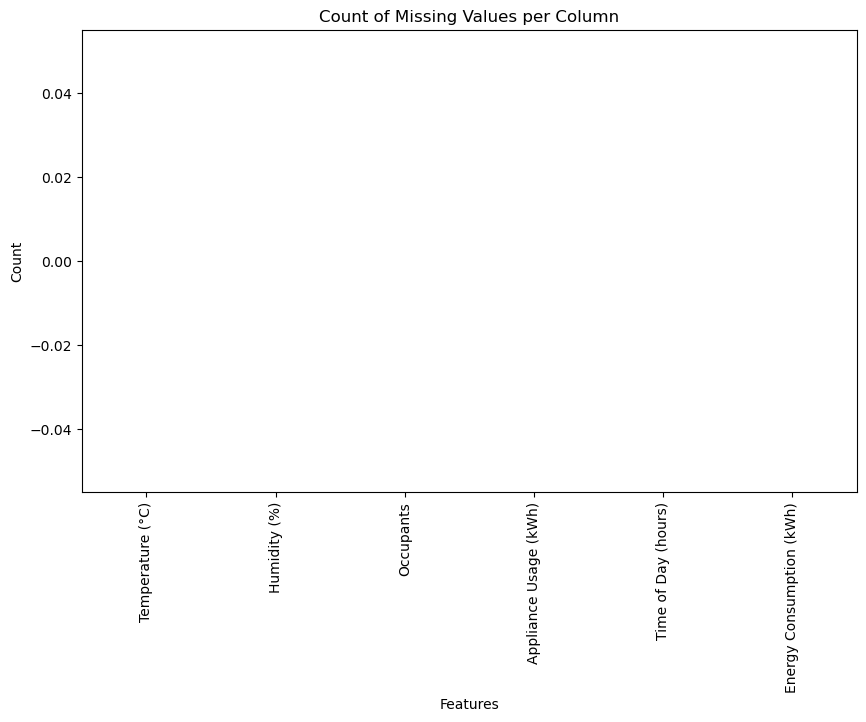

In [166]:
df.isnull().sum().plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Count of Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Features")
plt.show()

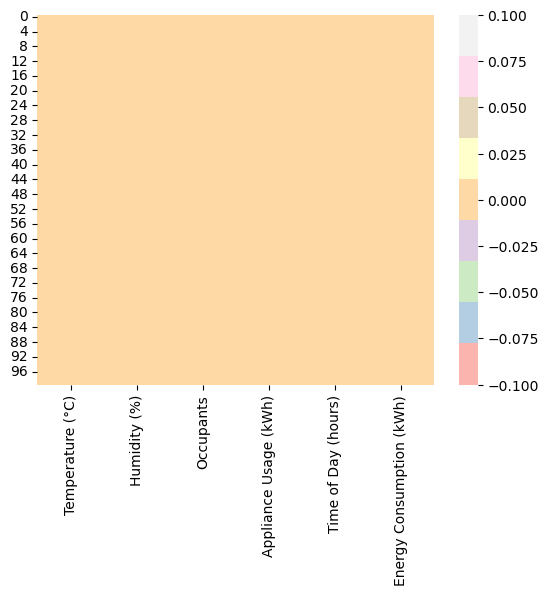

In [167]:
sns.heatmap(df.isnull(),cmap = 'Pastel1')
plt.show()

In [168]:
df.shape

(100, 6)

In [169]:
df.columns

Index(['Temperature (°C)', 'Humidity (%)', 'Occupants',
       'Appliance Usage (kWh)', 'Time of Day (hours)',
       'Energy Consumption (kWh)'],
      dtype='object')

## **Step 3 : Data Preprocessing**

**Identify numeric and categorical columns** **AND** **Define column transformer to scale and encode**

In [171]:
numberical_cols = ['Temperature (°C)', 'Humidity (%)', 'Occupants',
       'Appliance Usage (kWh)', 'Time of Day (hours)',
       'Energy Consumption (kWh)']
scaler= StandardScaler()
scaled_cols = pd.DataFrame(scaler.fit_transform(df[numberical_cols]),columns=numberical_cols)

**Define features (X) and target (y)**

In [174]:
x= df.drop(columns=['Energy Consumption (kWh)'])
y = df["Energy Consumption (kWh)"]

## **Step 4: Model Building**
To train and evaluate an SVM model using various kernels (linear, sigmoid, and RBF) and compare their performance.

Common steps include:
- **Model Training**:
For each kernel type, an SVM model is trained on the scaled features (X_scaled) and labels (y).

- **Prediction**:
The trained model makes predictions on the same dataset (X_scaled).

- **Evaluation Metrics**:

 - **Accuracy**: The proportion of correctly classified instances.
 - **Confusion Matrix**: Breakdown of true and false predictions.
 - **Classification Report**: Provides precision, recall, and F1-score for each class.

**Split into training and testing sets**

* **train_test_split()** splits data into training (80%) and testing (20%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [183]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size =0.8,random_state = 42)

**Training the model**

In [185]:
LR = LinearRegression()

In [186]:
LR 

LinearRegression()

In [187]:
LR.fit(x_train,y_train)

LinearRegression()

## **Model Evaluation**

In [189]:
y_predict = LR.predict(x_test)

In [190]:
mae = mean_absolute_error(y_test,y_predict)
print(mae)

0.407373142470307


In [192]:
mse = mean_squared_error(y_test,y_predict)
print(f"The mean squared error :{mse}")

The mean squared error :0.23685098710749122


In [193]:
rmse = np.sqrt(mse)
print(f"rmse:{rmse}")

rmse:0.4866733885343344


In [195]:
r2_score = r2_score(y_test,y_predict)
print(f"r2_score:{r2_score}")

r2_score:0.8000215833036312


## **Step 5: Hyperparameter Tuning**

This code uses GridSearchCV to find the best hyperparameters for an SVM model by testing different values for C, gamma, and the rbf kernel

**1. Linear Regression (Baseline Model)**
* No regularization, used as a baseline.
* Cross-validation with 5 folds evaluates R² performance.

**2. Ridge Regression (L2 Regularization)**
* **Hyperparameter**: alpha values [0.01, 0.1, 1, 5, 10, 50, 100]
* **GridSearchCV**:
  * Finds the best alpha using 5-fold CV.
  * Best model stored in best_ridge_model with best R².

**3. Lasso Regression (L1 Regularization)**
* **Hyperparameter**: alpha values [0.001, 0.01, 0.1, 1, 5, 10, 50]
* **GridSearchCV**:
  * Identifies best alpha for sparsity and feature selection.
  * Best model stored in best_lasso_model with best R².

**4. Model Comparison and Selection**
* **Criteria**: Highest R² score wins.
* **Best Model**: Selected between Linear, Ridge, and Lasso.
* Stored in best_model for further use



In [205]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge ,Lasso
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score

In [206]:
lr_model =  LinearRegression()
lr_score = cross_val_score(lr_model,x_train,y_train,cv =5)

In [209]:
ridge_model = Ridge(alpha=1.0)
ridge_score = cross_val_score(ridge_model,x_train, y_train ,cv = 5)

In [211]:
lasso_model = Lasso(alpha=1.0)
lasso_model = cross_val_score(lasso_model,x_train,y_train,cv = 5)

In [213]:
lr_model.fit(x_train,y_train)
lr_predictions=lr_model.predict(x_test)
lr_mse=mean_squared_error(y_test,lr_predictions)
lr_mse
lr_r2_score = r2_score(y_test, lr_predictions)
lr_r2_score * 100

80.00215833036312

In [215]:
ridge_model.fit(x_train,y_train)
ridge_predictions=ridge_model.predict(x_test)
ridge_r2 =r2_score(y_test,ridge_predictions)
ridge_r2*100


80.430361505252

In [217]:
lasso_model = Lasso()
lasso_model.fit(x_train,y_train)
lasso_predictions=lasso_model.predict(x_test)
lasso_r2 =r2_score(y_test,lasso_predictions)
lasso_r2*100

65.76502800422332